(362, 445, 3)


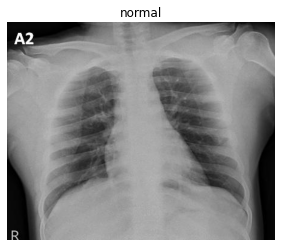

In [ ]:
import cv2
from skimage import io
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np


img = cv2.imread('/content/0.jpeg', 1)
print(img.shape)
#img = cv2.imread('images/retina.jpg', 1)

#Converting image to LAB Color so CLAHE can be applied to the luminance channel
lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

#plt.hist(l.flat, bins=100, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv2.equalizeHist(l)

#plt.hist(equ.flat, bins=100, range=(0,255))
#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv2.merge((equ,a,b))

#Convert LAB image back to color (RGB)
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
# plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

from google.colab.patches import cv2_imshow
plt.title("normal")
plt.imshow(img)
plt.axis('off')
cv2.waitKey(0)
cv2.destroyAllWindows() 
# plt.hist(img.flat, bins=100, range=(0, 255))

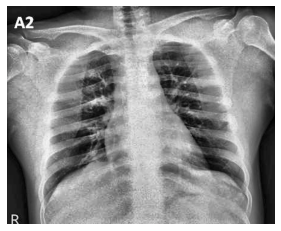

In [ ]:
# plt.title("CLAHE x-ray Covid")
plt.imshow(CLAHE_img)
plt.axis('off')
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.savefig('Clahe x-ray.JPEG')

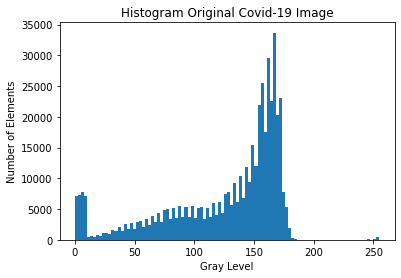

In [ ]:
plt.hist(img.flat, bins=100, range=(0, 255))
plt.xlabel('Gray Level')
plt.ylabel('Number of Elements')
plt.title('Histogram Original Covid-19 Image');

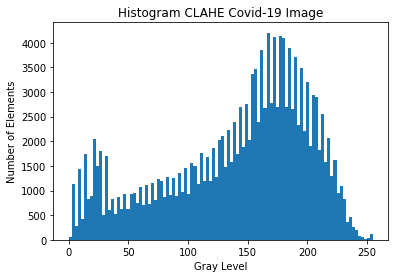

In [ ]:
plt.hist(clahe_img.flat, bins=100, range=(0,255))
plt.xlabel('Gray Level')
plt.ylabel('Number of Elements')
plt.title('Histogram CLAHE Covid-19 Image')
plt.savefig('Histogram CLAHE x-ray covid image.JPEG');

In [ ]:
# Resize Original Image
resized = cv2.resize(img, (432, 288))
print(f"Resized Dimensions : {resized.shape}")
cv2.imwrite('resized_imaged.JPEG', resized)

Resized Dimensions : (288, 432, 3)


True

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/resized_imaged.JPEG")
	compressed = cv2.imread("/content/Clahe.JPEG", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

original = cv2.imread("/content/resized_imaged.JPEG")
compressed = cv2.imread("/content/Clahe.JPEG", 1)

mse = np.mean((original - compressed) ** 2)
print(f"MSE value is {mse} dB")

TypeError: ignored

In [ ]:
from skimage.metrics import structural_similarity
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

# img00 = cv2.imread('images/monkey_distorted.jpg', 0)
# img01 = cv2.imread('images/monkey_rotated.jpg', 0)

img1 = cv2.imread('/content/resized_imaged.JPEG', 0)  # 714 x 901 pixels
img2 = cv2.imread('/content/Clahe.JPEG', 0)  # 714 x 901 pixels
# img3 = cv2.imread('images/BSE_smoothed.jpg', 0)  # 203 x 256 pixels
# img4 = cv2.imread('images/different_img.jpg', 0)  # 203 x 256 pixels

orb_similarity = orb_sim(img1, img2)  #1.0 means identical. Lower = not similar

print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
# from skimage.transform import resize
# img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(img1, img2) #1.0 means identical. Lower = not similar
print("Similarity using SSIM is: ", ssim)

In [ ]:
pip install sewar

In [ ]:
from sewar.full_ref import rmse

In [ ]:
print("RMSE: ", rmse(img2, img1))